# NBA Clustering

    By Charlie Marshall
    
    1 April 2020

In [72]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
pergame=pd.read_csv('PerGame.csv')

In [5]:
pergame.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams\adamsst01,C,26,OKC,58,58,27.0,4.5,7.6,0.591,...,0.590,3.4,6.0,9.4,2.4,0.9,1.1,1.5,1.9,10.9
1,Bam Adebayo\adebaba01,PF,22,MIA,65,65,34.4,6.3,11.1,0.567,...,0.690,2.5,8.0,10.5,5.1,1.2,1.3,2.8,2.5,16.2
2,LaMarcus Aldridge\aldrila01,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Nickeil Alexander-Walker\alexani01,SG,21,NOP,41,0,12.2,1.9,5.5,0.339,...,0.607,0.2,1.8,2.0,1.8,0.3,0.2,1.0,1.1,5.1
4,Grayson Allen\allengr01,SG,24,MEM,30,0,16.6,2.6,5.9,0.449,...,0.857,0.2,2.0,2.2,1.4,0.2,0.0,0.8,1.2,7.4


In [4]:
advanced=pd.read_csv('Advanced.csv')

In [6]:
advanced.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,Unnamed: 18,OWS,DWS,WS,WS/48,Unnamed: 23,OBPM,DBPM,BPM,VORP
0,Steven Adams\adamsst01,C,26,OKC,58,1564,20.8,0.605,0.007,0.413,...,NaN,3.7,2.5,6.2,0.190,NaN,2.1,1.1,3.2,2.0
1,Bam Adebayo\adebaba01,PF,22,MIA,65,2235,20.6,0.606,0.018,0.476,...,NaN,4.6,3.6,8.1,0.175,NaN,1.6,2.1,3.6,3.2
2,LaMarcus Aldridge\aldrila01,C,34,SAS,53,1754,19.8,0.571,0.198,0.241,...,NaN,3.1,1.4,4.4,0.122,NaN,1.8,-0.5,1.3,1.5
3,Nickeil Alexander-Walker\alexani01,SG,21,NOP,41,501,7.6,0.441,0.515,0.123,...,NaN,-0.7,0.4,-0.4,-0.034,NaN,-3.5,-1.4,-4.9,-0.4
4,Grayson Allen\allengr01,SG,24,MEM,30,498,11.4,0.577,0.517,0.199,...,NaN,0.5,0.3,0.7,0.070,NaN,-1.0,-1.5,-2.6,-0.1


## Preprocessing

In [39]:
pergame=pergame.dropna()

In [40]:
pergame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 0 to 513
Data columns (total 29 columns):
Player    460 non-null object
Pos       460 non-null object
Age       460 non-null int64
Tm        460 non-null object
G         460 non-null int64
GS        460 non-null int64
MP        460 non-null float64
FG        460 non-null float64
FGA       460 non-null float64
FG%       460 non-null float64
3P        460 non-null float64
3PA       460 non-null float64
3P%       460 non-null float64
2P        460 non-null float64
2PA       460 non-null float64
2P%       460 non-null float64
eFG%      460 non-null float64
FT        460 non-null float64
FTA       460 non-null float64
FT%       460 non-null float64
ORB       460 non-null float64
DRB       460 non-null float64
TRB       460 non-null float64
AST       460 non-null float64
STL       460 non-null float64
BLK       460 non-null float64
TOV       460 non-null float64
PF        460 non-null float64
PTS       460 non-null float64
dtype

In [111]:
advanced=advanced.dropna()

In [109]:
advanced=advanced.drop(['Unnamed: 18', 'Unnamed: 23'], axis=1)

In [112]:
advanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 513
Data columns (total 26 columns):
Player    509 non-null object
Pos       509 non-null object
Age       509 non-null int64
Tm        509 non-null object
G         509 non-null int64
MP        509 non-null int64
PER       509 non-null float64
TS%       509 non-null float64
3PAr      509 non-null float64
FTr       509 non-null float64
ORB%      509 non-null float64
DRB%      509 non-null float64
TRB%      509 non-null float64
AST%      509 non-null float64
STL%      509 non-null float64
BLK%      509 non-null float64
TOV%      509 non-null float64
USG%      509 non-null float64
OWS       509 non-null float64
DWS       509 non-null float64
WS        509 non-null float64
WS/48     509 non-null float64
OBPM      509 non-null float64
DBPM      509 non-null float64
BPM       509 non-null float64
VORP      509 non-null float64
dtypes: float64(20), int64(3), object(3)
memory usage: 107.4+ KB


In [14]:
pergame=pergame.replace({'C-PF':'C', 'PF-SF':'PF', 'SF-PF':'SF', 'SF-SG':'SF'})

In [41]:
set(pergame.Pos)

{'C', 'PF', 'PG', 'SF', 'SG'}

In [19]:
advanced=advanced.replace({'C-PF':'C', 'PF-SF':'PF', 'SF-PF':'SF', 'SF-SG':'SF'})

In [42]:
set(advanced.Pos)

{'C', 'PF', 'PG', 'SF', 'SG'}

## Splitting Per Game By Position

In [113]:
pg=advanced[advanced.Pos == 'PG'].reset_index(drop=True)

In [114]:
pg.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Ryan Arcidiacono\arcidry01,PG,25,CHI,58,930,9.0,0.551,0.627,0.173,...,13.5,12.5,0.7,0.7,1.4,0.070,-2.7,-0.1,-2.8,-0.2
1,D.J. Augustin\augusdj01,PG,32,ORL,49,1215,14.2,0.548,0.438,0.395,...,12.9,19.1,1.8,0.8,2.6,0.101,-0.3,-1.0,-1.4,0.2
2,Lonzo Ball\balllo01,PG,22,NOP,56,1817,13.7,0.529,0.578,0.107,...,20.7,18.6,0.7,1.9,2.6,0.068,0.4,0.6,1.0,1.3
3,J.J. Barea\bareajo01,PG,35,DAL,26,391,14.9,0.519,0.425,0.101,...,15.8,24.3,0.5,0.2,0.7,0.084,1.8,-2.7,-1.0,0.1
4,Patrick Beverley\beverpa01,PG,31,LAC,48,1299,12.3,0.554,0.609,0.126,...,15.7,13.0,1.4,2.0,3.4,0.126,-0.5,2.6,2.1,1.3


In [45]:
sg=pergame[pergame.Pos == 'SG'].reset_index(drop=True)

In [46]:
sg.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Nickeil Alexander-Walker\alexani01,SG,21,NOP,41,0,12.2,1.9,5.5,0.339,...,0.607,0.2,1.8,2.0,1.8,0.3,0.2,1.0,1.1,5.1
1,Grayson Allen\allengr01,SG,24,MEM,30,0,16.6,2.6,5.9,0.449,...,0.857,0.2,2.0,2.2,1.4,0.2,0.0,0.8,1.2,7.4
2,Kadeem Allen\allenka01,SG,27,NYK,10,0,11.7,1.9,4.4,0.432,...,0.636,0.2,0.7,0.9,2.1,0.5,0.2,0.8,0.7,5.0
3,Dwayne Bacon\bacondw01,SG,24,CHO,39,11,17.6,2.2,6.3,0.348,...,0.660,0.4,2.2,2.6,1.3,0.6,0.1,0.9,1.3,5.7
4,RJ Barrett\barrerj01,SG,19,NYK,56,55,30.4,5.2,13.0,0.402,...,0.614,0.9,4.1,5.0,2.6,1.0,0.3,2.2,2.2,14.3


In [47]:
sf=pergame[pergame.Pos == 'SF'].reset_index(drop=True)

In [48]:
sf.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Justin Anderson\anderju01,SF,26,BRK,3,0,5.7,0.3,2.0,0.167,...,0.500,0.0,0.7,0.7,0.0,0.0,0.3,0.0,0.7,1.0
1,Thanasis Antetokounmpo\antetth01,SF,27,MIL,18,2,5.2,1.1,2.0,0.528,...,0.467,0.6,0.4,1.1,0.5,0.3,0.1,0.6,0.7,2.5
2,OG Anunoby\anunoog01,SF,22,TOR,63,62,30.1,4.2,8.4,0.507,...,0.686,1.2,4.2,5.4,1.6,1.4,0.7,1.2,2.5,10.7
3,Trevor Ariza\arizatr01,SF,34,TOT,53,21,28.2,2.7,6.1,0.438,...,0.838,0.6,4.0,4.6,1.7,1.3,0.3,1.1,2.1,8.0
4,Will Barton\bartowi01,SF,29,DEN,58,58,33.0,5.7,12.7,0.450,...,0.767,1.3,5.0,6.3,3.7,1.1,0.5,1.5,2.1,15.1


In [49]:
pf=pergame[pergame.Pos == 'PF'].reset_index(drop=True)

In [50]:
pf.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Bam Adebayo\adebaba01,PF,22,MIA,65,65,34.4,6.3,11.1,0.567,...,0.690,2.5,8.0,10.5,5.1,1.2,1.3,2.8,2.5,16.2
1,Al-Farouq Aminu\aminual01,PF,29,ORL,18,2,21.1,1.4,4.8,0.291,...,0.655,1.3,3.5,4.8,1.2,1.0,0.4,0.9,1.5,4.3
2,Kyle Anderson\anderky01,PF,26,MEM,59,20,19.3,2.3,4.7,0.493,...,0.652,0.9,3.4,4.4,2.2,0.8,0.5,0.9,1.4,5.7
3,Giannis Antetokounmpo\antetgi01,PF,25,MIL,57,57,30.9,10.9,20.0,0.547,...,0.633,2.3,11.5,13.7,5.8,1.0,1.0,3.7,3.0,29.6
4,Carmelo Anthony\anthoca01,PF,35,POR,50,50,32.5,5.8,13.6,0.426,...,0.843,1.2,5.0,6.3,1.6,0.8,0.5,1.7,2.8,15.3


In [51]:
c=pergame[pergame.Pos == 'C'].reset_index(drop=True)

In [52]:
c.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams\adamsst01,C,26,OKC,58,58,27.0,4.5,7.6,0.591,...,0.590,3.4,6.0,9.4,2.4,0.9,1.1,1.5,1.9,10.9
1,LaMarcus Aldridge\aldrila01,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
2,Jarrett Allen\allenja01,C,21,BRK,64,58,25.7,4.2,6.5,0.646,...,0.620,3.0,6.4,9.5,1.3,0.6,1.3,1.1,2.3,10.6
3,Deandre Ayton\aytonde01,C,21,PHO,30,25,33.2,8.5,15.5,0.548,...,0.769,4.1,7.9,12.0,1.9,0.7,1.7,2.4,3.2,19.0
4,Mo Bamba\bambamo01,C,21,ORL,60,0,14.5,2.2,4.7,0.468,...,0.674,1.6,3.4,5.0,0.7,0.4,1.4,0.7,1.9,5.5


## Clustering

### Removing all factors except those which will be clustered on

In [115]:
pg.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Ryan Arcidiacono\arcidry01,PG,25,CHI,58,930,9.0,0.551,0.627,0.173,...,13.5,12.5,0.7,0.7,1.4,0.070,-2.7,-0.1,-2.8,-0.2
1,D.J. Augustin\augusdj01,PG,32,ORL,49,1215,14.2,0.548,0.438,0.395,...,12.9,19.1,1.8,0.8,2.6,0.101,-0.3,-1.0,-1.4,0.2
2,Lonzo Ball\balllo01,PG,22,NOP,56,1817,13.7,0.529,0.578,0.107,...,20.7,18.6,0.7,1.9,2.6,0.068,0.4,0.6,1.0,1.3
3,J.J. Barea\bareajo01,PG,35,DAL,26,391,14.9,0.519,0.425,0.101,...,15.8,24.3,0.5,0.2,0.7,0.084,1.8,-2.7,-1.0,0.1
4,Patrick Beverley\beverpa01,PG,31,LAC,48,1299,12.3,0.554,0.609,0.126,...,15.7,13.0,1.4,2.0,3.4,0.126,-0.5,2.6,2.1,1.3


In [116]:
pg_clust=pg.drop(['Player','Pos','Tm','G'], axis=1)

In [117]:
#pg_clust=pg.drop(['Player','Pos','Tm','G','GS'], axis=1)

In [118]:
pg_clust.describe()

,Age,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,...,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,26.032609,977.739130,13.160870,0.512870,0.391293,0.227174,2.446739,10.744565,6.591304,24.707609,...,14.943478,20.606522,1.140217,0.872826,2.017391,0.063598,-1.010870,-0.338043,-1.345652,0.627174
std,4.072019,685.707333,6.605591,0.095014,0.153211,0.175150,1.525782,4.053010,2.492832,9.617706,...,7.822977,5.922351,1.686733,0.842302,2.310492,0.098610,4.060679,1.778309,4.754949,1.200376
min,19.000000,8.000000,-5.300000,0.127000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7.100000,-1.300000,-0.100000,-1.300000,-0.253000,-14.300000,-5.700000,-16.000000,-1.700000
25%,23.000000,341.000000,9.275000,0.497750,0.302750,0.134500,1.575000,8.600000,5.300000,18.475000,...,12.400000,17.075000,0.000000,0.200000,0.100000,0.015250,-2.950000,-1.300000,-3.825000,-0.025000
50%,25.000000,1018.500000,13.700000,0.534000,0.403000,0.209000,2.300000,10.700000,6.450000,23.250000,...,14.600000,20.100000,0.550000,0.650000,1.650000,0.074000,-0.650000,-0.200000,-0.900000,0.200000
75%,29.000000,1525.750000,16.300000,0.557000,0.487750,0.289750,3.000000,12.525000,7.750000,31.800000,...,17.100000,23.725000,1.925000,1.400000,3.000000,0.109500,1.175000,0.775000,0.850000,1.100000
max,35.000000,2211.000000,33.200000,0.765000,0.842000,1.500000,8.200000,24.700000,14.600000,49.700000,...,71.400000,37.000000,8.900000,3.400000,9.600000,0.451000,8.400000,5.300000,13.700000,5.700000


In [119]:
scaler = preprocessing.StandardScaler().fit(pg_clust)
dfNorm = scaler.transform(pg_clust)

/Users/charlesmarshall/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/charlesmarshall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [120]:
maxClusters = 20
sse = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    sse.append(kmeans.inertia_)

In [121]:
print(sse)

[1521.4117789840573, 1325.5932770219529, 1197.0764587508002, 1126.774097727065, 992.5995307870959, 912.3021975785471, 874.4616558233158, 788.5521785699975, 760.4909347435548, 705.8136778120731, 647.6133633231782, 614.8225010687718, 585.6639467600497, 554.8545421733529, 521.4843045306815, 494.9952552923932, 490.90678974469387, 461.4124997301405]


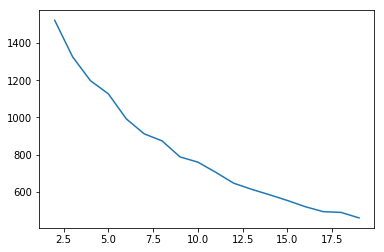

In [122]:
plt.plot(range(2,maxClusters),sse)

In [123]:
silh = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    silhouette_avg = silhouette_score(dfNorm, kmeans.labels_, sample_size = 10000)
    silh.append(silhouette_avg)

In [124]:
print(silh)

[0.2098204663916573, 0.17310484412426436, 0.15772472409612828, 0.11196133368066452, 0.1728581470706426, 0.15488797108739155, 0.11272543461283663, 0.10742570951658213, 0.12315862555496615, 0.11812754958842682, 0.10926020024683501, 0.13550672548239626, 0.11720103837471162, 0.11887485286566188, 0.10714875642385221, 0.10558533822781115, 0.10976983381631214, 0.1110583851969213]


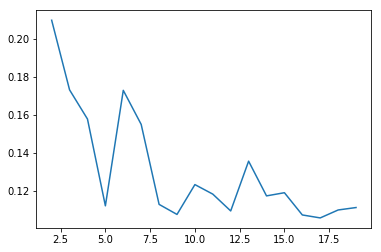

In [125]:
plt.plot(range(2,maxClusters),silh)

For n_clusters = 5 The average silhouette_score is : 0.11196133368066456
For n_clusters = 6 The average silhouette_score is : 0.17285814707064262
For n_clusters = 7 The average silhouette_score is : 0.15488797108739155
For n_clusters = 8 The average silhouette_score is : 0.11272543461283663


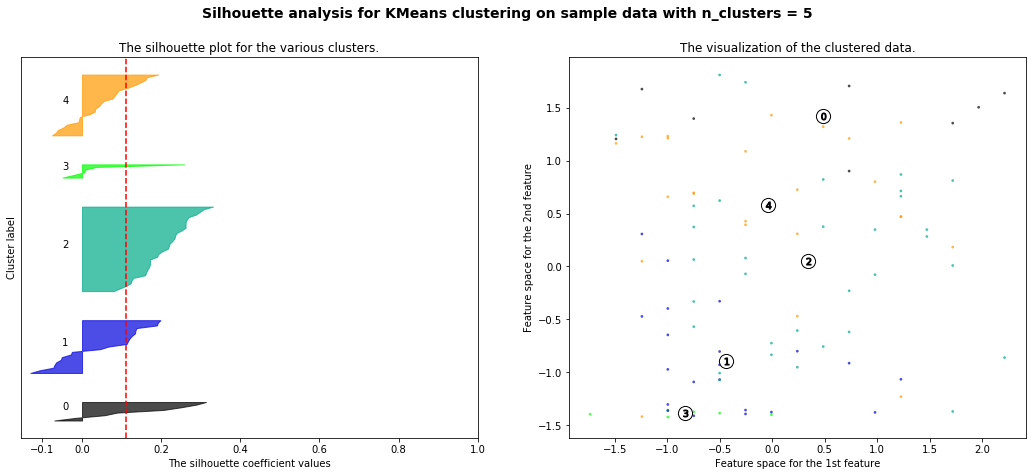

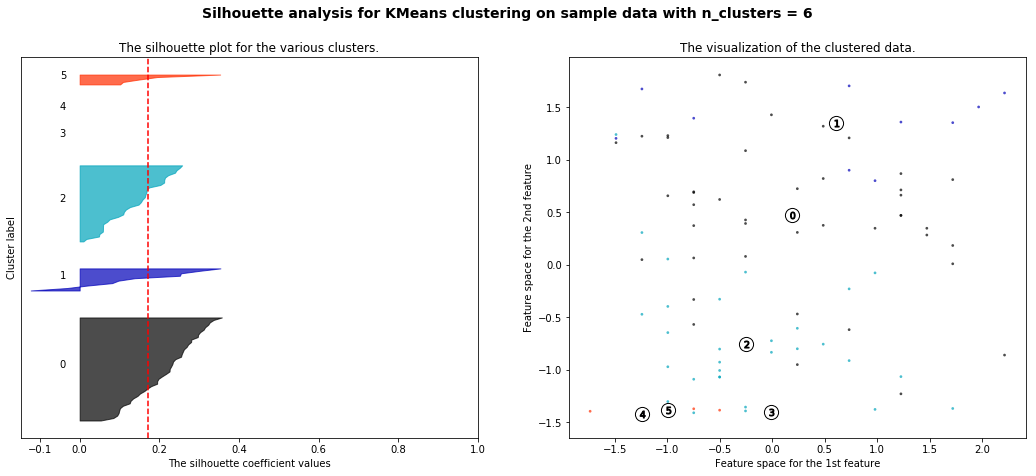

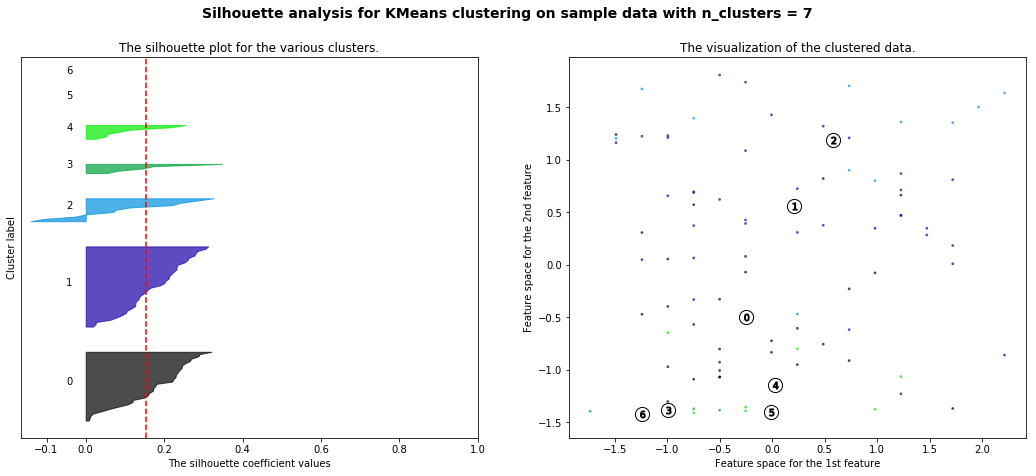

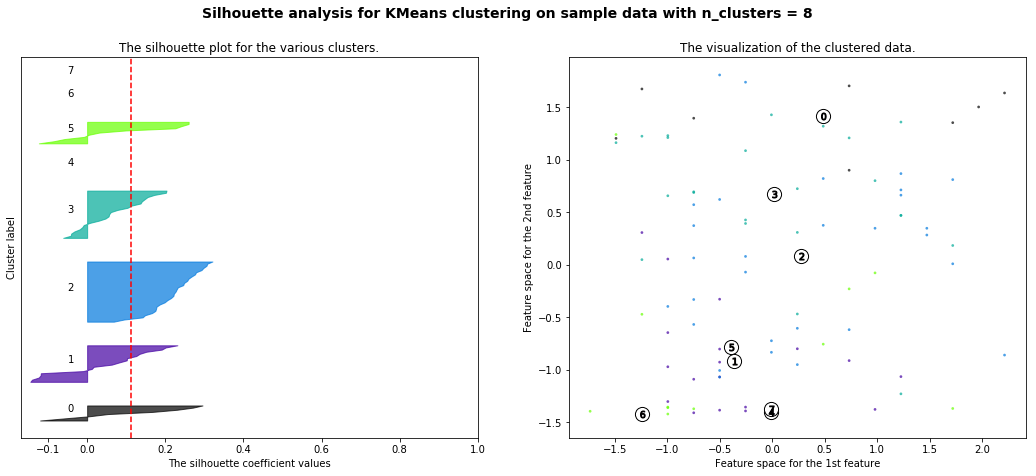

In [126]:
range_n_clusters = [5,6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    #ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(dfNorm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(dfNorm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dfNorm, kmeans.labels_, sample_size = 10000)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfNorm, kmeans.labels_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dfNorm[:, 0], dfNorm[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## K-Means Clustering

In [150]:
labels = KMeans(n_clusters=7, random_state=0).fit_predict(dfNorm)

In [151]:
pg_clust['Clusters'] = labels

In [152]:
pg['Clusters'] = labels

In [153]:
pg_clust['Clusters'].value_counts()

1    36
0    31
2    11
4     7
3     5
6     1
5     1
Name: Clusters, dtype: int64

In [154]:
pg_clust.groupby('Clusters').mean()

,Age,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Clusters,,,,,,,,,,,,,,,,,,,,,
0,25.000000,635.967742,10.467742,0.515129,0.450903,0.215645,2.074194,9.054839,5.512903,19.506452,...,14.438710,17.435484,0.180645,0.390323,0.570968,0.041742,-2.345161,-0.696774,-3.038710,-0.119355
1,26.888889,1361.666667,15.622222,0.543444,0.355778,0.231806,2.569444,11.736111,7.144444,28.758333,...,14.847222,21.727778,1.450000,1.213889,2.669444,0.095083,0.527778,-0.225000,0.302778,0.772222
2,28.363636,1787.818182,22.754545,0.588000,0.363000,0.347727,3.000000,15.336364,9.300000,36.309091,...,14.254545,29.063636,4.518182,2.118182,6.645455,0.179909,4.536364,0.554545,5.090909,3.172727
3,22.000000,32.400000,-0.220000,0.290600,0.562600,0.097200,0.000000,3.280000,1.660000,9.180000,...,7.540000,18.400000,-0.080000,0.000000,-0.060000,-0.141400,-9.180000,-2.680000,-11.840000,-0.060000
4,26.142857,193.571429,6.642857,0.352143,0.286714,0.165571,4.385714,12.314286,8.328571,20.757143,...,18.114286,18.014286,-0.314286,0.171429,-0.142857,-0.052143,-5.771429,0.757143,-5.000000,-0.128571
5,26.000000,23.000000,-5.000000,0.500000,0.000000,0.000000,4.600000,4.600000,4.600000,10.400000,...,71.400000,12.400000,-0.100000,0.000000,-0.100000,-0.224000,-11.300000,-4.700000,-16.000000,-0.100000
6,21.000000,11.000000,33.200000,0.765000,0.400000,0.400000,0.000000,9.400000,4.800000,32.100000,...,0.000000,22.900000,0.100000,0.000000,0.100000,0.451000,8.400000,5.300000,13.700000,0.000000


In [155]:
pg[pg.Clusters == 0]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
0,Ryan Arcidiacono\arcidry01,PG,25,CHI,58,930,9.0,0.551,0.627,0.173,...,12.5,0.7,0.7,1.4,0.070,-2.7,-0.1,-2.8,-0.2,0
7,Ky Bowman\bowmaky01,PG,22,GSW,45,1015,9.2,0.494,0.333,0.128,...,17.2,-0.6,0.6,-0.1,-0.003,-4.0,-0.3,-4.3,-0.6,0
10,Trey Burke\burketr01,PG,27,PHI,25,329,15.4,0.545,0.299,0.142,...,19.3,0.6,0.2,0.9,0.129,0.7,-1.1,-0.5,0.1,0
11,Jevon Carter\carteje01,PG,24,PHO,50,754,10.4,0.535,0.571,0.122,...,13.9,0.3,0.7,1.1,0.068,-1.6,1.0,-0.6,0.3,0
12,Alex Caruso\carusal01,PG,25,LAL,58,1032,11.0,0.538,0.412,0.292,...,13.9,0.6,1.6,2.2,0.103,-2.4,2.4,0.1,0.5,0
14,Chris Chiozza\chiozch01,PG,24,TOT,21,249,12.9,0.526,0.519,0.025,...,16.2,0.1,0.3,0.4,0.077,-0.8,1.6,0.8,0.2,0
16,Quinn Cook\cookqu01,PG,26,LAL,38,409,10.5,0.517,0.382,0.052,...,20.8,-0.1,0.4,0.4,0.043,-2.3,-1.0,-3.3,-0.1,0
18,Matthew Dellavedova\dellama01,PG,29,CLE,57,821,8.1,0.463,0.520,0.211,...,13.0,0.1,0.1,0.2,0.010,-3.6,-1.6,-5.2,-0.7,0
20,PJ Dozier\doziepj01,PG,23,DEN,21,234,9.3,0.449,0.308,0.121,...,19.8,-0.1,0.2,0.1,0.019,-4.4,-0.8,-5.2,-0.2,0
23,Yogi Ferrell\ferreyo01,PG,26,SAC,44,484,10.7,0.499,0.408,0.219,...,18.9,0.1,0.3,0.4,0.036,-2.1,-0.4,-2.5,-0.1,0


In [156]:
pg[pg.Clusters == 1]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
1,D.J. Augustin\augusdj01,PG,32,ORL,49,1215,14.2,0.548,0.438,0.395,...,19.1,1.8,0.8,2.6,0.101,-0.3,-1.0,-1.4,0.2,1
2,Lonzo Ball\balllo01,PG,22,NOP,56,1817,13.7,0.529,0.578,0.107,...,18.6,0.7,1.9,2.6,0.068,0.4,0.6,1.0,1.3,1
3,J.J. Barea\bareajo01,PG,35,DAL,26,391,14.9,0.519,0.425,0.101,...,24.3,0.5,0.2,0.7,0.084,1.8,-2.7,-1.0,0.1,1
4,Patrick Beverley\beverpa01,PG,31,LAC,48,1299,12.3,0.554,0.609,0.126,...,13.0,1.4,2.0,3.4,0.126,-0.5,2.6,2.1,1.3,1
8,Malcolm Brogdon\brogdma01,PG,27,IND,48,1472,17.8,0.537,0.296,0.246,...,25.2,2.0,1.4,3.5,0.113,2.2,-0.5,1.7,1.4,1
9,Jalen Brunson\brunsja01,PG,23,DAL,57,1022,15.0,0.553,0.309,0.193,...,20.4,1.6,0.7,2.3,0.108,0.1,-0.9,-0.8,0.3,1
15,Mike Conley\conlemi01,PG,32,UTA,41,1171,13.7,0.527,0.438,0.241,...,23.0,1.0,1.0,2.1,0.085,0.4,-0.4,0.0,0.6,1
17,Stephen Curry\curryst01,PG,31,GSW,5,139,21.7,0.557,0.598,0.317,...,33.6,0.2,0.1,0.3,0.104,4.5,-0.6,3.9,0.2,1
21,Goran Dragić\dragigo01,PG,33,MIA,54,1531,15.9,0.571,0.472,0.333,...,25.7,2.0,1.1,3.0,0.095,1.4,-1.9,-0.5,0.6,1
22,Kris Dunn\dunnkr01,PG,25,CHI,51,1269,12.1,0.510,0.327,0.158,...,14.6,0.3,2.0,2.3,0.085,-3.7,3.1,-0.6,0.4,1


In [157]:
pg[pg.Clusters == 2]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
5,Eric Bledsoe\bledser01,PG,30,MIL,56,1524,18.1,0.579,0.304,0.292,...,24.0,2.4,2.9,5.3,0.168,1.1,1.1,2.2,1.6,2
19,Luka Dončić\doncilu01,PG,20,DAL,54,1799,27.7,0.584,0.442,0.442,...,37.0,5.8,2.3,8.1,0.215,7.3,1.1,8.4,4.7,2
34,Kyrie Irving\irvinky01,PG,27,BRK,20,658,26.3,0.595,0.341,0.245,...,32.6,2.1,0.8,3.0,0.216,6.6,1.0,7.6,1.6,2
37,LeBron James\jamesle01,PG,35,LAL,60,2094,26.0,0.582,0.324,0.292,...,31.6,6.1,3.4,9.5,0.218,6.8,1.9,8.7,5.7,2
43,Damian Lillard\lillada01,PG,29,POR,58,2140,26.2,0.619,0.493,0.377,...,30.2,8.9,0.7,9.6,0.215,7.9,-0.7,7.2,5.0,2
44,Kyle Lowry\lowryky01,PG,33,TOR,52,1901,17.9,0.589,0.583,0.399,...,23.1,4.1,2.8,6.9,0.173,2.5,0.7,3.2,2.5,2
62,Chris Paul\paulch01,PG,34,OKC,63,2003,21.7,0.609,0.347,0.311,...,23.2,5.5,2.5,8.1,0.194,3.1,1.2,4.3,3.2,2
75,Ben Simmons\simmobe01,PG,23,PHI,54,1930,20.8,0.608,0.010,0.460,...,20.9,3.8,3.2,7.0,0.174,1.4,2.4,3.9,2.9,2
85,Kemba Walker\walkeke02,PG,29,BOS,50,1592,20.2,0.569,0.526,0.270,...,27.8,3.5,1.9,5.4,0.163,5.0,-0.2,4.7,2.7,2
89,Russell Westbrook\westbru01,PG,31,HOU,53,1905,21.5,0.539,0.168,0.289,...,34.4,2.1,2.3,4.3,0.109,1.9,-0.1,1.8,1.8,2


In [158]:
pg[pg.Clusters == 3]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
6,Jordan Bone\bonejo01,PG,22,DET,10,53,0.8,0.300,0.500,0.000,...,18.1,-0.1,0.0,-0.1,-0.118,-9.0,-2.9,-11.9,-0.1,3
13,Joe Chealey\chealjo01,PG,24,CHO,4,33,-2.8,0.127,0.571,0.286,...,13.2,-0.2,0.0,-0.1,-0.189,-14.3,1.7,-12.6,-0.1,3
31,Jared Harper\harpeja01,PG,22,PHO,3,8,-5.3,0.250,0.500,0.000,...,21.3,0.0,0.0,0.0,-0.253,-10.2,-5.7,-15.8,0.0,3
42,Jalen Lecque\lecquja01,PG,19,PHO,4,26,5.0,0.460,0.400,0.200,...,19.4,0.0,0.0,0.0,-0.042,-5.7,-3.6,-9.3,0.0,3
84,Gabe Vincent\vincega01,PG,23,MIA,6,42,1.2,0.316,0.842,0.000,...,20.0,-0.1,0.0,-0.1,-0.105,-6.7,-2.9,-9.6,-0.1,3


In [159]:
pg[pg.Clusters == 4]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
45,Josh Magette\magetjo01,PG,30,ORL,8,38,5.1,0.378,0.267,0.133,...,23.8,-0.2,0.1,-0.1,-0.126,-8.0,1.6,-6.4,0.0,4
46,Jeremiah Martin\martije02,PG,23,BRK,3,16,5.9,0.200,0.200,0.000,...,13.1,0.0,0.0,0.0,-0.040,-6.6,3.6,-3.0,0.0,4
47,Frank Mason III\masonfr01,PG,25,MIL,6,53,4.2,0.337,0.526,0.211,...,20.8,-0.2,0.1,-0.1,-0.060,-7.5,-0.9,-8.4,-0.1,4
64,Gary Payton II\paytoga02,PG,27,WAS,29,432,11.3,0.473,0.397,0.069,...,13.4,0.1,0.4,0.4,0.049,-3.1,1.5,-1.6,0.0,4
76,Dennis Smith Jr.\smithde03,PG,22,NYK,34,537,7.5,0.399,0.256,0.251,...,23.1,-1.3,0.5,-0.9,-0.079,-5.2,-0.9,-6.1,-0.6,4
82,Evan Turner\turneev01,PG,31,ATL,19,251,6.8,0.424,0.075,0.209,...,16.4,-0.5,0.1,-0.3,-0.064,-4.9,-0.7,-5.6,-0.2,4
90,Nigel Williams-Goss\willini01,PG,25,UTA,9,28,5.7,0.254,0.286,0.286,...,15.5,-0.1,0.0,0.0,-0.045,-5.1,1.1,-3.9,0.0,4


In [160]:
pg[pg.Clusters == 5]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
30,Josh Gray\grayjo01,PG,26,NOP,2,23,-5.0,0.5,0.0,0.0,...,12.4,-0.1,0.0,-0.1,-0.224,-11.3,-4.7,-16.0,-0.1,5


In [161]:
pg[pg.Clusters == 6]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
65,Shamorie Ponds\pondssh01,PG,21,TOR,4,11,33.2,0.765,0.4,0.4,...,22.9,0.1,0.0,0.1,0.451,8.4,5.3,13.7,0.0,6


## All NBA Players

### Removing all factors except those which will be clustered on

In [162]:
advanced.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Steven Adams\adamsst01,C,26,OKC,58,1564,20.8,0.605,0.007,0.413,...,14.1,17.2,3.7,2.5,6.2,0.190,2.1,1.1,3.2,2.0
1,Bam Adebayo\adebaba01,PF,22,MIA,65,2235,20.6,0.606,0.018,0.476,...,17.5,20.8,4.6,3.6,8.1,0.175,1.6,2.1,3.6,3.2
2,LaMarcus Aldridge\aldrila01,C,34,SAS,53,1754,19.8,0.571,0.198,0.241,...,7.8,23.6,3.1,1.4,4.4,0.122,1.8,-0.5,1.3,1.5
3,Nickeil Alexander-Walker\alexani01,SG,21,NOP,41,501,7.6,0.441,0.515,0.123,...,14.3,22.8,-0.7,0.4,-0.4,-0.034,-3.5,-1.4,-4.9,-0.4
4,Grayson Allen\allengr01,SG,24,MEM,30,498,11.4,0.577,0.517,0.199,...,10.7,17.9,0.5,0.3,0.7,0.070,-1.0,-1.5,-2.6,-0.1


In [163]:
adv_clust=advanced.drop(['Player','Pos','Tm','G'], axis=1)

In [174]:
adv_clust.describe()

,Age,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,25.500982,922.078585,12.553438,0.529204,0.383495,0.251326,4.750688,15.243418,10.001768,13.162279,...,12.790177,18.573870,1.009823,0.932809,1.943222,0.068521,-1.579568,-0.210216,-1.786444,0.464637
std,4.058443,671.715630,6.961246,0.117137,0.209513,0.169382,3.976276,7.137076,4.956652,8.973971,...,6.361970,5.690693,1.476316,0.873699,2.152498,0.110439,3.777578,1.812917,4.818733,0.999551
min,19.000000,1.000000,-40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.000000,-1.700000,-0.100000,-1.300000,-1.036000,-24.400000,-15.100000,-39.500000,-1.700000
25%,22.000000,291.000000,9.300000,0.502000,0.257000,0.153000,2.000000,10.700000,6.400000,7.200000,...,9.700000,14.800000,0.000000,0.200000,0.200000,0.036000,-3.100000,-1.100000,-3.400000,-0.100000
50%,25.000000,895.000000,12.600000,0.546000,0.398000,0.227000,3.400000,14.100000,9.000000,10.400000,...,12.400000,17.600000,0.500000,0.700000,1.300000,0.082000,-1.100000,-0.200000,-1.200000,0.100000
75%,28.000000,1506.000000,16.300000,0.589000,0.522000,0.323000,6.500000,19.200000,12.400000,17.500000,...,14.900000,21.700000,1.800000,1.500000,3.200000,0.120000,0.500000,0.800000,0.800000,0.800000
max,43.000000,2243.000000,33.200000,0.776000,1.000000,1.500000,20.600000,52.800000,33.600000,49.700000,...,71.400000,42.800000,8.900000,4.800000,11.500000,0.451000,8.400000,7.200000,13.700000,6.300000


In [175]:
scaler = preprocessing.StandardScaler().fit(adv_clust)
dfNorm = scaler.transform(adv_clust)

/Users/charlesmarshall/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/charlesmarshall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [176]:
maxClusters = 20
sse = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    sse.append(kmeans.inertia_)

In [177]:
print(sse)

[8865.459920710908, 7866.429753089227, 6901.654963183979, 6339.949114007647, 6033.91636026434, 5744.389159905153, 5525.51792614172, 5340.223488858159, 5163.494571413047, 5027.449089983545, 4875.767956840835, 4766.373592292823, 4637.8367450947335, 4482.922876646914, 4406.528136953311, 4274.189026551127, 4177.524102933525, 4077.757393886522]


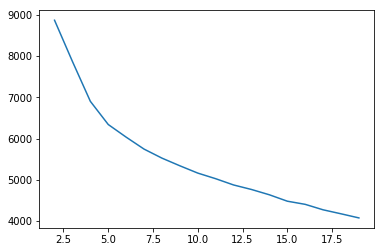

In [178]:
plt.plot(range(2,maxClusters),sse)

In [179]:
silh = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    silhouette_avg = silhouette_score(dfNorm, kmeans.labels_, sample_size = 10000)
    silh.append(silhouette_avg)

In [180]:
print(silh)

[0.19816187543655625, 0.1907700335157226, 0.21364668642810364, 0.15892976178022605, 0.15429972700527553, 0.12930993047029876, 0.11651623762774167, 0.12755257254275426, 0.12759471459687338, 0.10724179315232156, 0.10701622228060585, 0.09856400103811158, 0.10159412999978497, 0.10565543778097783, 0.10528572227409555, 0.09114339058334704, 0.10750017925329744, 0.1008307547642066]


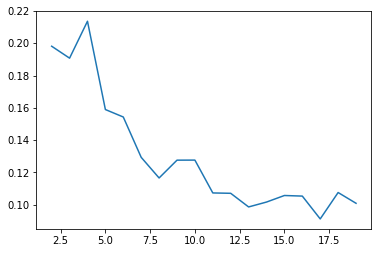

In [181]:
plt.plot(range(2,maxClusters),silh)

For n_clusters = 5 The average silhouette_score is : 0.15892976178022603
For n_clusters = 7 The average silhouette_score is : 0.12930993047029876
For n_clusters = 8 The average silhouette_score is : 0.11651623762774167
For n_clusters = 11 The average silhouette_score is : 0.10724179315232157


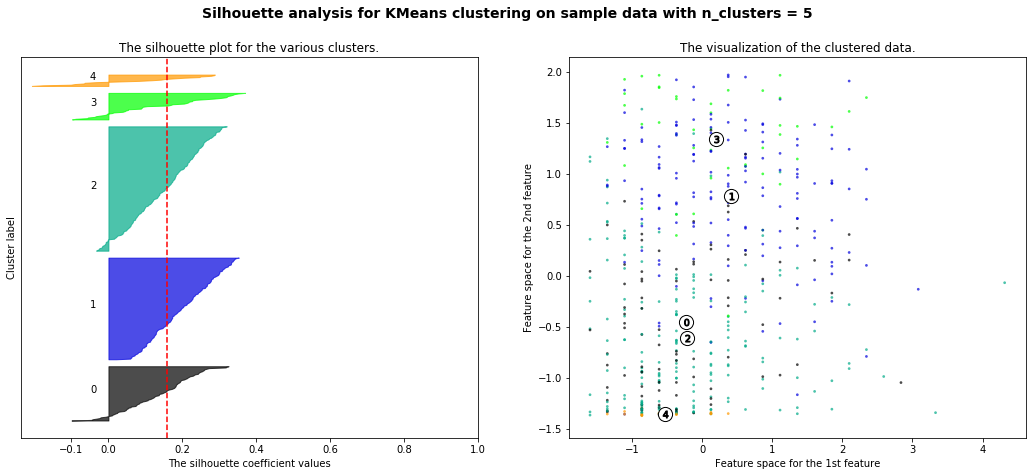

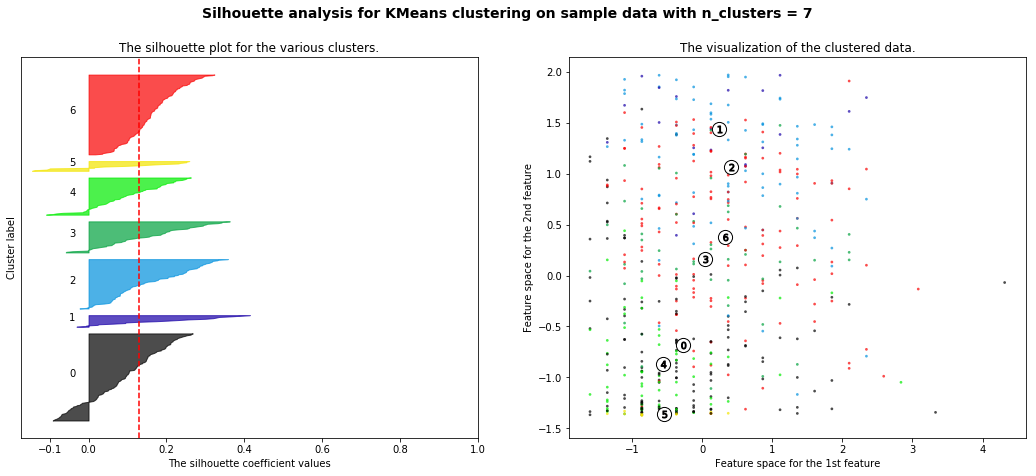

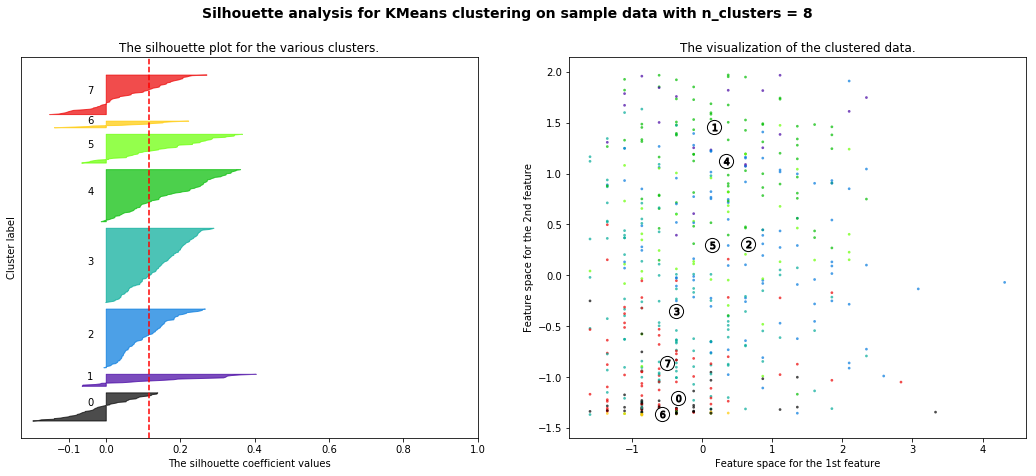

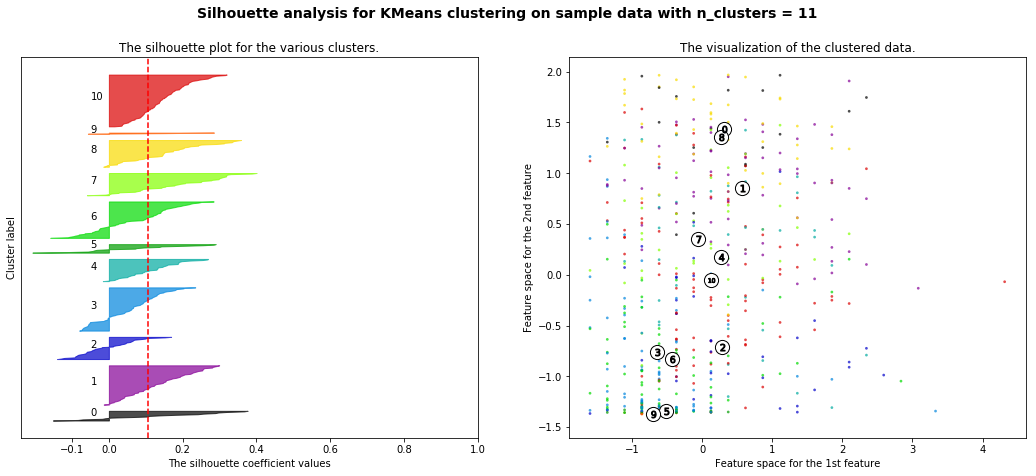

In [183]:
range_n_clusters = [5,7,8,11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    #ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(dfNorm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(dfNorm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dfNorm, kmeans.labels_, sample_size = 10000)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfNorm, kmeans.labels_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dfNorm[:, 0], dfNorm[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## K-Means Clustering

In [184]:
labels = KMeans(n_clusters=11, random_state=0).fit_predict(dfNorm)

In [185]:
adv_clust['Clusters'] = labels

In [152]:
pg['Clusters'] = labels

In [187]:
adv_clust['Clusters'].value_counts()

10    92
3     77
1     70
6     65
8     48
7     40
4     40
2     40
0     18
5     16
9      3
Name: Clusters, dtype: int64

In [188]:
adv_clust.groupby('Clusters').mean()

,Age,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Clusters,,,,,,,,,,,,,,,,,,,,,
0,26.777778,1884.555556,24.677778,0.605444,0.261444,0.417222,6.105556,23.044444,14.738889,27.916667,...,13.405556,28.061111,5.344444,2.927778,8.283333,0.210833,4.827778,1.594444,6.400000,3.988889
1,27.814286,1495.842857,13.441429,0.577986,0.496400,0.209886,4.134286,15.500000,9.850000,10.498571,...,11.271429,16.448571,1.645714,1.687143,3.322857,0.109057,-0.341429,0.474286,0.137143,0.800000
2,26.625000,446.000000,10.102500,0.471025,0.484550,0.166650,3.395000,14.252500,8.807500,12.372500,...,12.870000,14.510000,0.045000,0.557500,0.607500,0.051375,-3.037500,1.695000,-1.345000,0.070000
3,22.870130,412.168831,6.631169,0.438169,0.418195,0.250870,3.314286,11.876623,7.603896,11.237662,...,13.138961,17.020779,-0.284416,0.272727,-0.007792,-0.016532,-5.085714,-0.835065,-5.909091,-0.284416
4,26.600000,1036.350000,14.485000,0.540300,0.343975,0.221750,2.900000,11.475000,7.157500,26.047500,...,15.157500,20.067500,0.800000,0.920000,1.725000,0.085175,-0.370000,-0.157500,-0.532500,0.342500
5,23.375000,18.500000,-5.556250,0.182750,0.447062,0.020812,1.618750,14.818750,8.331250,8.212500,...,20.500000,15.925000,-0.093750,0.000000,-0.081250,-0.227562,-10.743750,-3.737500,-14.487500,-0.056250
6,23.738462,366.769231,14.561538,0.586923,0.144662,0.383108,10.293846,21.061538,15.632308,7.783077,...,15.815385,16.707692,0.410769,0.381538,0.790769,0.103523,-2.247692,-0.076923,-2.321538,0.006154
7,25.275000,1157.725000,20.337500,0.624850,0.112600,0.350075,11.340000,24.040000,17.692500,9.840000,...,12.540000,18.257500,2.400000,1.735000,4.130000,0.179700,0.945000,1.035000,1.987500,1.080000
8,26.562500,1830.562500,18.343750,0.568479,0.369333,0.280667,2.654167,13.406250,8.050000,23.487500,...,12.187500,26.737500,2.645833,1.608333,4.256250,0.114167,2.295833,-0.654167,1.654167,1.618750


In [155]:
pg[pg.Clusters == 0]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
0,Ryan Arcidiacono\arcidry01,PG,25,CHI,58,930,9.0,0.551,0.627,0.173,...,12.5,0.7,0.7,1.4,0.070,-2.7,-0.1,-2.8,-0.2,0
7,Ky Bowman\bowmaky01,PG,22,GSW,45,1015,9.2,0.494,0.333,0.128,...,17.2,-0.6,0.6,-0.1,-0.003,-4.0,-0.3,-4.3,-0.6,0
10,Trey Burke\burketr01,PG,27,PHI,25,329,15.4,0.545,0.299,0.142,...,19.3,0.6,0.2,0.9,0.129,0.7,-1.1,-0.5,0.1,0
11,Jevon Carter\carteje01,PG,24,PHO,50,754,10.4,0.535,0.571,0.122,...,13.9,0.3,0.7,1.1,0.068,-1.6,1.0,-0.6,0.3,0
12,Alex Caruso\carusal01,PG,25,LAL,58,1032,11.0,0.538,0.412,0.292,...,13.9,0.6,1.6,2.2,0.103,-2.4,2.4,0.1,0.5,0
14,Chris Chiozza\chiozch01,PG,24,TOT,21,249,12.9,0.526,0.519,0.025,...,16.2,0.1,0.3,0.4,0.077,-0.8,1.6,0.8,0.2,0
16,Quinn Cook\cookqu01,PG,26,LAL,38,409,10.5,0.517,0.382,0.052,...,20.8,-0.1,0.4,0.4,0.043,-2.3,-1.0,-3.3,-0.1,0
18,Matthew Dellavedova\dellama01,PG,29,CLE,57,821,8.1,0.463,0.520,0.211,...,13.0,0.1,0.1,0.2,0.010,-3.6,-1.6,-5.2,-0.7,0
20,PJ Dozier\doziepj01,PG,23,DEN,21,234,9.3,0.449,0.308,0.121,...,19.8,-0.1,0.2,0.1,0.019,-4.4,-0.8,-5.2,-0.2,0
23,Yogi Ferrell\ferreyo01,PG,26,SAC,44,484,10.7,0.499,0.408,0.219,...,18.9,0.1,0.3,0.4,0.036,-2.1,-0.4,-2.5,-0.1,0


In [156]:
pg[pg.Clusters == 1]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
1,D.J. Augustin\augusdj01,PG,32,ORL,49,1215,14.2,0.548,0.438,0.395,...,19.1,1.8,0.8,2.6,0.101,-0.3,-1.0,-1.4,0.2,1
2,Lonzo Ball\balllo01,PG,22,NOP,56,1817,13.7,0.529,0.578,0.107,...,18.6,0.7,1.9,2.6,0.068,0.4,0.6,1.0,1.3,1
3,J.J. Barea\bareajo01,PG,35,DAL,26,391,14.9,0.519,0.425,0.101,...,24.3,0.5,0.2,0.7,0.084,1.8,-2.7,-1.0,0.1,1
4,Patrick Beverley\beverpa01,PG,31,LAC,48,1299,12.3,0.554,0.609,0.126,...,13.0,1.4,2.0,3.4,0.126,-0.5,2.6,2.1,1.3,1
8,Malcolm Brogdon\brogdma01,PG,27,IND,48,1472,17.8,0.537,0.296,0.246,...,25.2,2.0,1.4,3.5,0.113,2.2,-0.5,1.7,1.4,1
9,Jalen Brunson\brunsja01,PG,23,DAL,57,1022,15.0,0.553,0.309,0.193,...,20.4,1.6,0.7,2.3,0.108,0.1,-0.9,-0.8,0.3,1
15,Mike Conley\conlemi01,PG,32,UTA,41,1171,13.7,0.527,0.438,0.241,...,23.0,1.0,1.0,2.1,0.085,0.4,-0.4,0.0,0.6,1
17,Stephen Curry\curryst01,PG,31,GSW,5,139,21.7,0.557,0.598,0.317,...,33.6,0.2,0.1,0.3,0.104,4.5,-0.6,3.9,0.2,1
21,Goran Dragić\dragigo01,PG,33,MIA,54,1531,15.9,0.571,0.472,0.333,...,25.7,2.0,1.1,3.0,0.095,1.4,-1.9,-0.5,0.6,1
22,Kris Dunn\dunnkr01,PG,25,CHI,51,1269,12.1,0.510,0.327,0.158,...,14.6,0.3,2.0,2.3,0.085,-3.7,3.1,-0.6,0.4,1


In [157]:
pg[pg.Clusters == 2]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
5,Eric Bledsoe\bledser01,PG,30,MIL,56,1524,18.1,0.579,0.304,0.292,...,24.0,2.4,2.9,5.3,0.168,1.1,1.1,2.2,1.6,2
19,Luka Dončić\doncilu01,PG,20,DAL,54,1799,27.7,0.584,0.442,0.442,...,37.0,5.8,2.3,8.1,0.215,7.3,1.1,8.4,4.7,2
34,Kyrie Irving\irvinky01,PG,27,BRK,20,658,26.3,0.595,0.341,0.245,...,32.6,2.1,0.8,3.0,0.216,6.6,1.0,7.6,1.6,2
37,LeBron James\jamesle01,PG,35,LAL,60,2094,26.0,0.582,0.324,0.292,...,31.6,6.1,3.4,9.5,0.218,6.8,1.9,8.7,5.7,2
43,Damian Lillard\lillada01,PG,29,POR,58,2140,26.2,0.619,0.493,0.377,...,30.2,8.9,0.7,9.6,0.215,7.9,-0.7,7.2,5.0,2
44,Kyle Lowry\lowryky01,PG,33,TOR,52,1901,17.9,0.589,0.583,0.399,...,23.1,4.1,2.8,6.9,0.173,2.5,0.7,3.2,2.5,2
62,Chris Paul\paulch01,PG,34,OKC,63,2003,21.7,0.609,0.347,0.311,...,23.2,5.5,2.5,8.1,0.194,3.1,1.2,4.3,3.2,2
75,Ben Simmons\simmobe01,PG,23,PHI,54,1930,20.8,0.608,0.010,0.460,...,20.9,3.8,3.2,7.0,0.174,1.4,2.4,3.9,2.9,2
85,Kemba Walker\walkeke02,PG,29,BOS,50,1592,20.2,0.569,0.526,0.270,...,27.8,3.5,1.9,5.4,0.163,5.0,-0.2,4.7,2.7,2
89,Russell Westbrook\westbru01,PG,31,HOU,53,1905,21.5,0.539,0.168,0.289,...,34.4,2.1,2.3,4.3,0.109,1.9,-0.1,1.8,1.8,2


In [158]:
pg[pg.Clusters == 3]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
6,Jordan Bone\bonejo01,PG,22,DET,10,53,0.8,0.300,0.500,0.000,...,18.1,-0.1,0.0,-0.1,-0.118,-9.0,-2.9,-11.9,-0.1,3
13,Joe Chealey\chealjo01,PG,24,CHO,4,33,-2.8,0.127,0.571,0.286,...,13.2,-0.2,0.0,-0.1,-0.189,-14.3,1.7,-12.6,-0.1,3
31,Jared Harper\harpeja01,PG,22,PHO,3,8,-5.3,0.250,0.500,0.000,...,21.3,0.0,0.0,0.0,-0.253,-10.2,-5.7,-15.8,0.0,3
42,Jalen Lecque\lecquja01,PG,19,PHO,4,26,5.0,0.460,0.400,0.200,...,19.4,0.0,0.0,0.0,-0.042,-5.7,-3.6,-9.3,0.0,3
84,Gabe Vincent\vincega01,PG,23,MIA,6,42,1.2,0.316,0.842,0.000,...,20.0,-0.1,0.0,-0.1,-0.105,-6.7,-2.9,-9.6,-0.1,3


In [159]:
pg[pg.Clusters == 4]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
45,Josh Magette\magetjo01,PG,30,ORL,8,38,5.1,0.378,0.267,0.133,...,23.8,-0.2,0.1,-0.1,-0.126,-8.0,1.6,-6.4,0.0,4
46,Jeremiah Martin\martije02,PG,23,BRK,3,16,5.9,0.200,0.200,0.000,...,13.1,0.0,0.0,0.0,-0.040,-6.6,3.6,-3.0,0.0,4
47,Frank Mason III\masonfr01,PG,25,MIL,6,53,4.2,0.337,0.526,0.211,...,20.8,-0.2,0.1,-0.1,-0.060,-7.5,-0.9,-8.4,-0.1,4
64,Gary Payton II\paytoga02,PG,27,WAS,29,432,11.3,0.473,0.397,0.069,...,13.4,0.1,0.4,0.4,0.049,-3.1,1.5,-1.6,0.0,4
76,Dennis Smith Jr.\smithde03,PG,22,NYK,34,537,7.5,0.399,0.256,0.251,...,23.1,-1.3,0.5,-0.9,-0.079,-5.2,-0.9,-6.1,-0.6,4
82,Evan Turner\turneev01,PG,31,ATL,19,251,6.8,0.424,0.075,0.209,...,16.4,-0.5,0.1,-0.3,-0.064,-4.9,-0.7,-5.6,-0.2,4
90,Nigel Williams-Goss\willini01,PG,25,UTA,9,28,5.7,0.254,0.286,0.286,...,15.5,-0.1,0.0,0.0,-0.045,-5.1,1.1,-3.9,0.0,4


In [160]:
pg[pg.Clusters == 5]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
30,Josh Gray\grayjo01,PG,26,NOP,2,23,-5.0,0.5,0.0,0.0,...,12.4,-0.1,0.0,-0.1,-0.224,-11.3,-4.7,-16.0,-0.1,5


In [161]:
pg[pg.Clusters == 6]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
65,Shamorie Ponds\pondssh01,PG,21,TOR,4,11,33.2,0.765,0.4,0.4,...,22.9,0.1,0.0,0.1,0.451,8.4,5.3,13.7,0.0,6
